# Fabric Semantic Link Labs Demo

Complete example : [Tutorial: Extract and calculate Power BI measures from a Jupyter notebook - Microsoft Fabric | Microsoft Learn](https://learn.microsoft.com/en-us/fabric/data-science/tutorial-power-bi-measures)

New semantic link labs samples : [semantic-link-labs/notebooks/Tabular Object Model.ipynb at main · microsoft/semantic-link-labs (github.com)](https://github.com/microsoft/semantic-link-labs/blob/main/notebooks/Tabular Object Model.ipynb)

[Tutorial: Clean data with functional dependencies - Microsoft Fabric | Microsoft Learn](https://learn.microsoft.com/en-us/fabric/data-science/tutorial-data-cleaning-functional-dependencies)

[microsoft/semantic-link-labs: Early access to new features for Microsoft Fabric semantic link. (github.com)](https://github.com/microsoft/semantic-link-labs/)





In [1]:
%pip install semantic-link-labs

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 7, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semantic-link-sempy 0.7.2
    Not uninstalling semantic-link-sempy at /home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages, outside environment /nfs4/pyenv-7cc3574a-3be7-4a68-b9d0-191887970e74
    Can't uninstall 'semantic-link-sempy'. No files were found to uninstall.

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [39]:
import sempy.fabric as fabric

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 50, Finished, Available, Finished)

In [38]:
fabric.list_datasets()

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 49, Finished, Available, Finished)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,LakeDBIA,f33b1e86-9f51-4406-9edb-f141ba6d4ccd,2021-02-12 23:00:58,NaT
1,HotelsReviews,40b907f1-ce9f-4ead-b77c-18c2d7065449,2021-02-12 23:00:58,NaT
2,Retail Analysis Sample PBIX,755e94b5-c5c3-49e5-aa04-fa12f35f2af9,2014-05-30 20:16:22,2024-07-17 09:08:48


In [29]:
import sempy_labs as labs
from sempy_labs.tom import connect_semantic_model

dataset = 'Retail Analysis Sample PBIX' # Enter dataset name
workspace = 'Data Science' # Enter workspace name

with connect_semantic_model(dataset=dataset, readonly=True, workspace=workspace) as tom:
    for t in tom.model.Tables:
        print(t.Name)

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 40, Finished, Available, Finished)

Store
Sales
Item
Time
District
DateTableTemplate_ca45d427-b349-4299-a604-253b0d3519f7
LocalDateTable_0eafa36c-5fc2-4b6f-84df-278a77695bc4
LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066f16d8


In [6]:
fabric.list_measures(dataset)

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 13, Finished, Available, Finished)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Store,Average Selling Area Size,AVERAGE([SellingAreaSize]),Double,False,,,"#,0",,None,None
1,Store,New Stores,"CALCULATE(COUNTA([Store Type]), FILTER(ALL(Sto...",Int64,False,,,,,None,None
2,Store,New Stores Target,14,Int64,False,,,,,None,None
3,Store,Total Stores,COUNTA([StoreNumberName]),Int64,False,,,0,,None,None
4,Store,Open Store Count,COUNTA([OpenDate]),Int64,False,,,0,,None,None
5,Store,Count of OpenDate,COUNTA('Store'[OpenDate]),Int64,False,,,,,None,None
6,Sales,Regular_Sales_Dollars,SUM([Sum_Regular_Sales_Dollars]),Double,False,,,,,None,None
7,Sales,Markdown_Sales_Dollars,SUM([Sum_Markdown_Sales_Dollars]),Double,False,,,,,None,None
8,Sales,TotalSales,[Regular_Sales_Dollars]+[Markdown_Sales_Dollars],Double,False,,,,,None,None
9,Sales,TotalSalesLY,"CALCULATE([TotalSales], Sales[ScenarioID]=2)",Double,False,,,"\$#,0;(\$#,0);\$#,0",,None,None


In [8]:
fabric.evaluate_measure(dataset, measure="Average Selling Area Size", groupby_columns=["Store[Chain]", "Store[DistrictName]"])

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 15, Finished, Available, Finished)

,Chain,DistrictName,Average Selling Area Size
0,Fashions Direct,FD - District #1,43888.888889
1,Fashions Direct,FD - District #2,47777.777778
2,Fashions Direct,FD - District #3,50000.0
3,Fashions Direct,FD - District #4,50500.0
4,Lindseys,LI - District #1,10384.615385
5,Lindseys,LI - District #2,10909.090909
6,Lindseys,LI - District #3,10333.333333
7,Lindseys,LI - District #4,12500.0
8,Lindseys,LI - District #5,11785.714286


In [11]:
df_sales = fabric.evaluate_measure(
    dataset,
    # One or more measures
    ["TotalSales"],
    # Zero or more dimensions
    ["Store[Territory]", "Time[FiscalYear]"],
)

df_sales.head()

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 18, Finished, Available, Finished)

,Territory,FiscalYear,TotalSales
0,DE,2014,533182.12
1,GA,2014,1464669.38
2,KY,2014,1166812.74
3,MD,2014,3672298.32
4,NC,2014,4571634.449999


StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 22, Finished, Available, Finished)

<Axes: xlabel='Territory'>

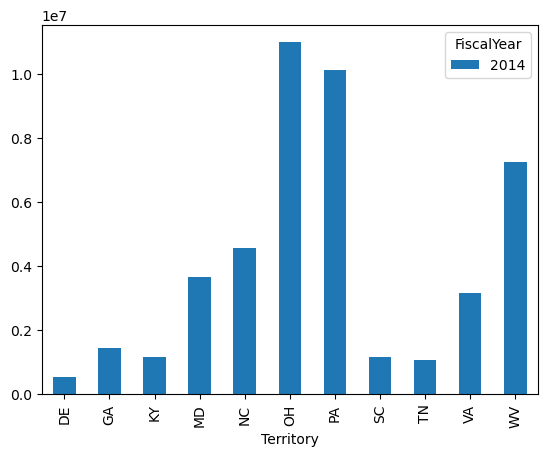

In [15]:
df_sales.pivot_table(index="Territory", columns="FiscalYear", values="TotalSales").plot.bar()

In [33]:
import sempy_labs.tom as tom
from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 44, Finished, Available, Finished)

In [35]:
relationships = fabric.list_relationships(dataset)
relationships

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 46, Finished, Available, Finished)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,Store,DistrictID,District,DistrictID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-04 22:30:41,3eef198b-ca6c-4ee3-a0bd-9e35b5c725b8
1,m:1,Sales,LocationID,Store,LocationID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-04 22:30:41,4e8a6ba0-ddf4-46af-996a-c4b2b4dbe2bf
2,m:1,Sales,ItemID,Item,ItemID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-04 22:30:41,e16ca2b4-d139-4ef8-9a00-5b7616ecc5ac
3,m:1,Sales,ReportingPeriodID,Time,ReportingPeriodID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2017-03-04 22:30:41,d3e1e755-e88f-4569-bd13-f1041030ae98
4,m:1,Store,OpenDate,LocalDateTable_0eafa36c-5fc2-4b6f-84df-278a776...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2017-03-04 22:30:43,74e52eb9-ac73-4b07-bb52-1b4cca072b32
5,m:1,Time,Month,LocalDateTable_2403841f-d1ed-4123-bf26-4ba8066...,Date,True,OneDirection,OneDirection,DatePartOnly,False,Ready,2017-03-04 22:30:43,ffdea654-6956-479d-9b81-f720c4647966


StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 26, Finished, Available, Finished)

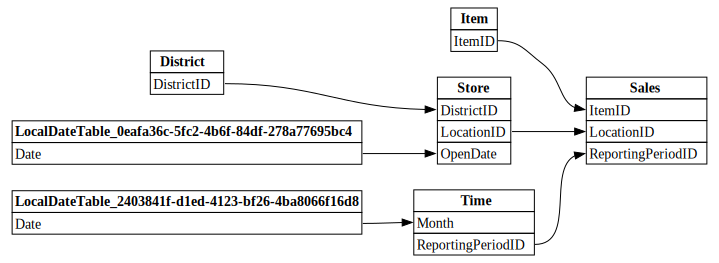

In [19]:
plot_relationship_metadata(relationships)

In [20]:
fabric.list_reports()

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 27, Finished, Available, Finished)

,Id,Report Type,Name,Web Url,Embed Url,Is From Pbix,Is Owned By Me,Dataset Id,Dataset Workspace Id,Users,Subscriptions
0,d7ff5316-2c4d-427a-b497-eeef668f2e47,PowerBIReport,HotelsReviewsAI,https://app.powerbi.com/groups/218a8247-5e0e-4...,https://app.powerbi.com/reportEmbed?reportId=d...,False,True,f33b1e86-9f51-4406-9edb-f141ba6d4ccd,218a8247-5e0e-44fa-8ef0-5a272a4f891a,[],[]
1,655df33b-bf15-494c-a75a-7dfd27e01569,PowerBIReport,HotelsReviewsClassification,https://app.powerbi.com/groups/218a8247-5e0e-4...,https://app.powerbi.com/reportEmbed?reportId=6...,False,True,f33b1e86-9f51-4406-9edb-f141ba6d4ccd,218a8247-5e0e-44fa-8ef0-5a272a4f891a,[],[]
2,c3dd99dc-67e6-4b1b-a1d8-23b358edbaf2,PowerBIReport,Retail Analysis Sample PBIX,https://app.powerbi.com/groups/218a8247-5e0e-4...,https://app.powerbi.com/reportEmbed?reportId=c...,True,True,755e94b5-c5c3-49e5-aa04-fa12f35f2af9,218a8247-5e0e-44fa-8ef0-5a272a4f891a,[],[]


In [23]:
import sempy_labs.report as reports
reports.launch_report("Retail Analysis Sample PBIX")

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 30, Finished, Available, Finished)

Report()

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 31, Finished, Available, Finished)

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 32, Finished, Available, Finished)

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 33, Finished, Available, Finished)

StatementMeta(, 6d6f2426-2590-4d7e-98e8-741d069f6e7a, 34, Finished, Available, Finished)